In [ ]:
"""

En desuso

Nos servía para entrenar un modelo por cada clase de "las grandes"

"""

In [2]:
import sys
import json
import numpy as np
import pandas as pd
import time
import cv2

In [5]:
class ML_divided:
    def __init__(self, json_both, json_onlyleft, json_onlyright, json_radio, json_drinking, json_reachside, json_phonecallright):
        self.both_j = json_both
        self.onlyleft_j = json_onlyleft
        self.onlyright_j = json_onlyright
        self.radio_j = json_radio
        self.drinking_j = json_drinking
        self.reachside_j = json_reachside
        self.phonecallright_j = json_phonecallright

        self.both = []
        self.onlyleft = []
        self.onlyright = []
        self.radio = []
        self.drinking = []
        self.reachside = []
        self.phonecallright = []

        self.rows = []

    def open_jsons(self):

        try:
            with open(self.both_j, 'r', encoding='utf-8-sig') as f:
                self.both = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.both_j}. Trying alternative encoding...")
            with open(self.both_j, 'r', encoding='latin-1') as f:
                self.both = json.load(f)

        try:
            with open(self.onlyleft_j, 'r', encoding='utf-8-sig') as f:
                self.onlyleft = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.onlyleft_j}. Trying alternative encoding...")
            with open(self.onlyleft_j, 'r', encoding='latin-1') as f:
                self.onlyleft = json.load(f)

        try:
            with open(self.onlyright_j, 'r', encoding='utf-8-sig') as f:
                self.onlyright = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.onlyright_j}. Trying alternative encoding...")
            with open(self.onlyright_j, 'r', encoding='latin-1') as f:
                self.onlyright = json.load(f)

        try:
            with open(self.radio_j, 'r', encoding='utf-8-sig') as f:
                self.radio = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.radio_j}. Trying alternative encoding...")
            with open(self.radio_j, 'r', encoding='latin-1') as f:
                self.radio = json.load(f)

        try:
            with open(self.drinking_j, 'r', encoding='utf-8-sig') as f:
                self.drinking = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.drinking_j}. Trying alternative encoding...")
            with open(self.drinking_j, 'r', encoding='latin-1') as f:
                self.drinking = json.load(f)

        try:
            with open(self.reachside_j, 'r', encoding='utf-8-sig') as f:
                self.reachside = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.reachside_j}. Trying alternative encoding...")
            with open(self.reachside_j, 'r', encoding='latin-1') as f:
                self.reachside = json.load(f)

        try:
            with open(self.phonecallright_j, 'r', encoding='utf-8-sig') as f:
                self.phonecallright = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.phonecallright_j}. Trying alternative encoding...")
            with open(self.phonecallright_j, 'r', encoding='latin-1') as f:
                self.phonecallright = json.load(f)

    def prepare_data(self, data, rows):

        for item in data:

            features = {
                "center_left_x": item['pose']['pose'][50][0],
                "center_left_y": item['pose']['pose'][50][1],
                "center_right_x": item['pose']['pose'][51][0],
                "center_right_y": item['pose']['pose'][51][1],
                "pose_0_x": item['pose']['pose'][0][0],
                "pose_0_y": item['pose']['pose'][0][1],
                "pose_1_x": item['pose']['pose'][1][0],
                "pose_1_y": item['pose']['pose'][1][1],
                "pose_2_x": item['pose']['pose'][2][0],
                "pose_2_y": item['pose']['pose'][2][1],
                "pose_3_x": item['pose']['pose'][3][0],
                "pose_3_y": item['pose']['pose'][3][1],
                "pose_4_x": item['pose']['pose'][4][0],
                "pose_4_y": item['pose']['pose'][4][1],
                "pose_5_x": item['pose']['pose'][5][0],
                "pose_5_y": item['pose']['pose'][5][1],
                "type": item['type']
            }
            
            rows.append(features)

        return rows

In [7]:
json_files = [  '/home/arantxa/universidad/TFG/src/balanced_data/hands_using_wheel_both.json', 
                '/home/arantxa/universidad/TFG/src/balanced_data/hands_using_wheel_only_left.json', 
                '/home/arantxa/universidad/TFG/src/balanced_data/hands_using_wheel_only_right.json',
                '/home/arantxa/universidad/TFG/src/balanced_data/driver_actions_radio.json', 
                '/home/arantxa/universidad/TFG/src/balanced_data/driver_actions_drinking.json', 
                '/home/arantxa/universidad/TFG/src/balanced_data/driver_actions_reach_side.json', 
                '/home/arantxa/universidad/TFG/src/balanced_data/driver_actions_phonecall_right.json']

        
ML_performer = ML_divided(*json_files)
ML_performer.open_jsons()

rows_wheel = []
rows_driving = []

rows_wheel = ML_performer.prepare_data(ML_performer.both, rows_wheel)
rows_wheel = ML_performer.prepare_data(ML_performer.onlyleft, rows_wheel)
rows_wheel = ML_performer.prepare_data(ML_performer.onlyright, rows_wheel)

rows_driving = ML_performer.prepare_data(ML_performer.radio, rows_driving)
rows_driving = ML_performer.prepare_data(ML_performer.drinking, rows_driving)
rows_driving = ML_performer.prepare_data(ML_performer.reachside, rows_driving)
rows_driving = ML_performer.prepare_data(ML_performer.phonecallright, rows_driving)

dataset_wheel = pd.DataFrame(rows_wheel)
dataset_driving = pd.DataFrame(rows_driving)
print(dataset_wheel)

      center_left_x  center_left_y  center_right_x  center_right_y  pose_0_x  \
0          0.743550       0.619071        0.693113        0.321460  0.373959   
1          0.743340       0.620055        0.692823        0.321257  0.373974   
2          0.742518       0.620522        0.691809        0.320131  0.373852   
3          0.742903       0.621250        0.690796        0.319402  0.373757   
4          0.742530       0.621325        0.690298        0.318795  0.373532   
...             ...            ...             ...             ...       ...   
3145       0.734695       0.301921        0.000000        0.000000  0.323977   
3146       0.737940       0.308113        0.000000        0.000000  0.324274   
3147       0.738863       0.317536        0.000000        0.000000  0.325064   
3148       0.742282       0.327699        0.569792        0.427423  0.325072   
3149       0.742489       0.337534        0.571368        0.429029  0.329052   

      pose_0_y  pose_1_x  pose_1_y  pos

In [8]:
dataset_wheel['type'] = dataset_wheel['type'].replace("hands_using_wheel/both", 0)
dataset_wheel['type'] = dataset_wheel['type'].replace("hands_using_wheel/only_left", 1)
dataset_wheel['type'] = dataset_wheel['type'].replace("hands_using_wheel/only_right", 2)
dataset_driving['type'] = dataset_driving['type'].replace("driver_actions/radio", 3)
dataset_driving['type'] = dataset_driving['type'].replace("driver_actions/drinking", 4)
dataset_driving['type'] = dataset_driving['type'].replace("driver_actions/reach_side", 5)
dataset_driving['type'] = dataset_driving['type'].replace("driver_actions/phonecall_right", 6)

In [9]:
print(dataset_driving)

      center_left_x  center_left_y  center_right_x  center_right_y  pose_0_x  \
0          0.717746       0.719644        0.633603        0.366838  0.324228   
1          0.728288       0.742697        0.634643        0.363254  0.318457   
2          0.737638       0.763949        0.635307        0.361184  0.318283   
3          0.752069       0.773681        0.638107        0.356955  0.317850   
4          0.764769       0.774642        0.640116        0.344297  0.323387   
...             ...            ...             ...             ...       ...   
4195       0.332028       0.210118        0.725491        0.403355  0.345658   
4196       0.332467       0.209694        0.726125        0.398464  0.341597   
4197       0.332491       0.209401        0.726425        0.393098  0.338317   
4198       0.332165       0.209000        0.726959        0.387802  0.334666   
4199       0.331942       0.209576        0.727659        0.382270  0.333337   

      pose_0_y  pose_1_x  pose_1_y  pos

In [59]:
df_grouped = (
    dataset.groupby(list(dataset.columns[:-1]), as_index=False)
    .agg({"type": lambda x: ','.join(map(str, sorted(x.unique())))})
)

dataset = df_grouped

In [10]:
from sklearn.model_selection import train_test_split

X_wheel = dataset_wheel.iloc[:, :-1] # todo menos etiquetas
Y_wheel = dataset_wheel.iloc[:, -1] # etiquetas

X_train_wheel, X_test_wheel, Y_train_wheel, Y_test_wheel = train_test_split(X_wheel.values, Y_wheel, test_size=0.25, random_state=1)

X_driving = dataset_driving.iloc[:, :-1] # todo menos etiquetas
Y_driving = dataset_driving.iloc[:, -1] # etiquetas

X_train_driving, X_test_driving, Y_train_driving, Y_test_driving = train_test_split(X_driving.values, Y_driving, test_size=0.25, random_state=1)

# repasar que esto se haga bien

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train_wheel)
X_train_std_wheel = sc.transform(X_train_wheel)
X_test_std_wheel = sc.transform(X_test_wheel)

sc.fit(X_train_driving)
X_train_std_driving = sc.transform(X_train_driving)
X_test_std_driving = sc.transform(X_test_driving)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_classifier_wheel = SVC(kernel='rbf', probability=True, random_state=42)
svm_classifier_wheel.fit(X_train_wheel, Y_train_wheel)

probabilities_wheel = svm_classifier_wheel.predict_proba(X_test_wheel)

for i, probs in enumerate(probabilities_wheel[:100]):
    print(f"Instancia {i+1}:")
    for cls, prob in enumerate(probs):
        print(f"  Clase {cls}: {prob:.2f}")

Y_pred_wheel = svm_classifier_wheel.predict(X_test_wheel)

print("\nReporte de clasificación hands on wheel:")
print(classification_report(Y_test_wheel, Y_pred_wheel))

svm_classifier_driving = SVC(kernel='rbf', probability=True, random_state=42)
svm_classifier_driving.fit(X_train_driving, Y_train_driving)

probabilities_driving = svm_classifier_driving.predict_proba(X_test_driving)

for i, probs in enumerate(probabilities_driving[:100]):
    print(f"Instancia {i+1}:")
    for cls, prob in enumerate(probs):
        print(f"  Clase {cls}: {prob:.2f}")

Y_pred_driving = svm_classifier_driving.predict(X_test_driving)

print("\nReporte de clasificación driver actions:")
print(classification_report(Y_test_driving, Y_pred_driving))


Reporte de clasificación hands on wheel:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       274
           1       1.00      0.96      0.98       268
           2       1.00      1.00      1.00       246

    accuracy                           0.98       788
   macro avg       0.99      0.99      0.99       788
weighted avg       0.99      0.98      0.98       788

Instancia 1:
  Clase 0: 0.00
  Clase 1: 0.00
  Clase 2: 0.01
  Clase 3: 0.99
Instancia 2:
  Clase 0: 1.00
  Clase 1: 0.00
  Clase 2: 0.00
  Clase 3: 0.00
Instancia 3:
  Clase 0: 0.00
  Clase 1: 0.00
  Clase 2: 0.99
  Clase 3: 0.00
Instancia 4:
  Clase 0: 0.00
  Clase 1: 1.00
  Clase 2: 0.00
  Clase 3: 0.00
Instancia 5:
  Clase 0: 1.00
  Clase 1: 0.00
  Clase 2: 0.00
  Clase 3: 0.00
Instancia 6:
  Clase 0: 1.00
  Clase 1: 0.00
  Clase 2: 0.00
  Clase 3: 0.00
Instancia 7:
  Clase 0: 0.00
  Clase 1: 0.00
  Clase 2: 1.00
  Clase 3: 0.00
Instancia 8:
  Clase 0: 0.00
  Clase 1

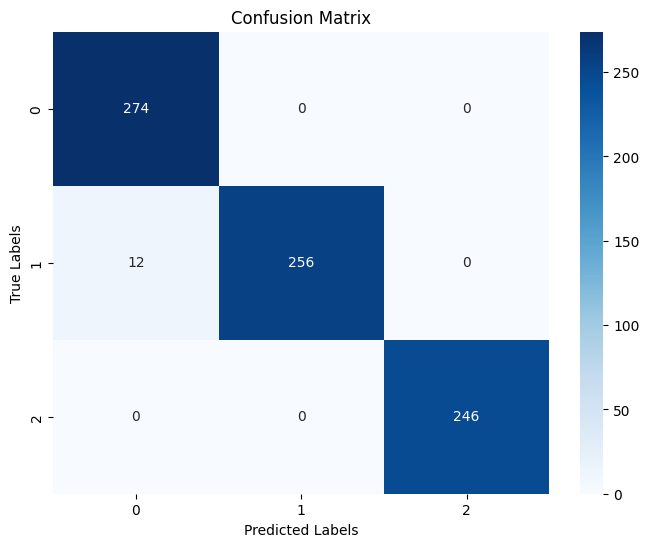

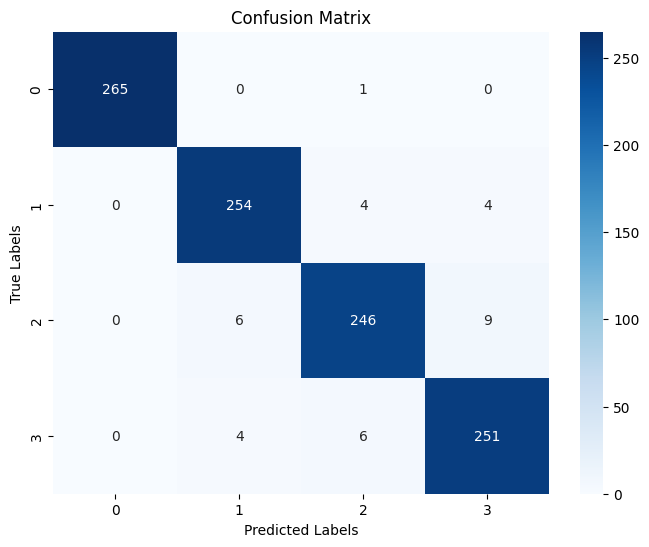

In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

conf_matrix_wheel = confusion_matrix(Y_test_wheel, Y_pred_wheel)

# Mostrar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_wheel, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

conf_matrix_driving = confusion_matrix(Y_test_driving, Y_pred_driving)

# Mostrar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_driving, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy wheel: 0.9949238578680203

Classification Report wheel:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       274
           1       1.00      0.99      0.99       268
           2       1.00      1.00      1.00       246

    accuracy                           0.99       788
   macro avg       1.00      1.00      1.00       788
weighted avg       0.99      0.99      0.99       788

Accuracy driving: 0.9923809523809524

Classification Report driving:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       266
           4       1.00      1.00      1.00       262
           5       0.98      1.00      0.99       261
           6       1.00      0.98      0.99       261

    accuracy                           0.99      1050
   macro avg       0.99      0.99      0.99      1050
weighted avg       0.99      0.99      0.99      1050



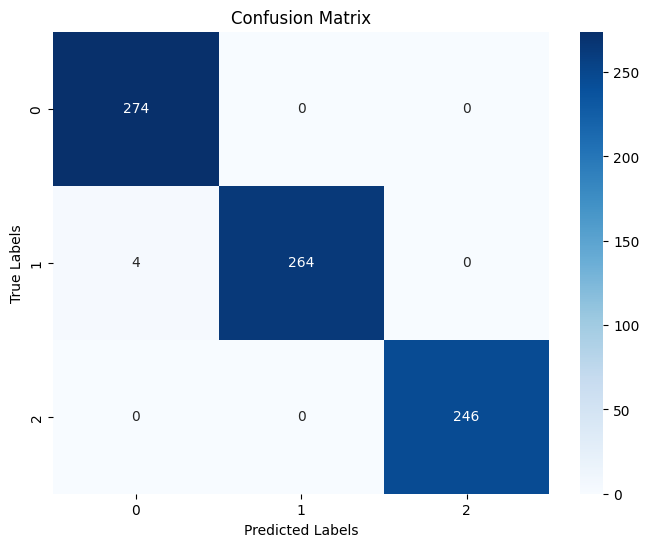

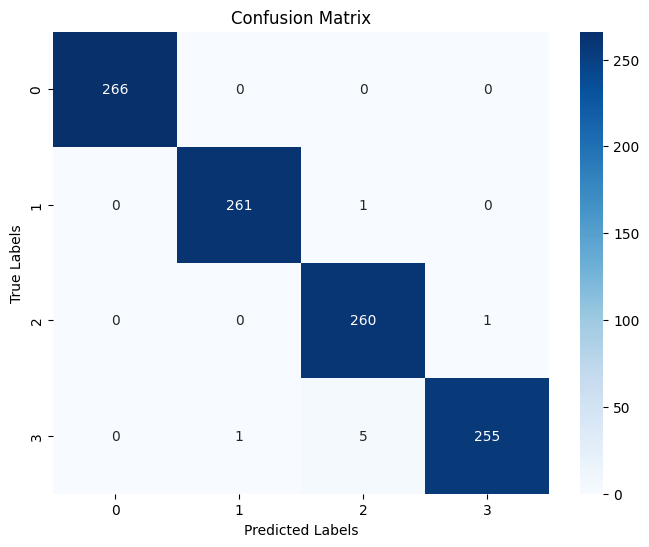

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Entrenar el modelo Random Forest
model_wheel = RandomForestClassifier(random_state=1)
model_wheel.fit(X_train_wheel, Y_train_wheel)

# Hacer predicciones
Y_pred_wheel = model_wheel.predict(X_test_wheel)

# Evaluación
print("Accuracy wheel:", accuracy_score(Y_test_wheel, Y_pred_wheel))
print("\nClassification Report wheel:")
print(classification_report(Y_test_wheel, Y_pred_wheel))

# Entrenar el modelo Random Forest
model_driving = RandomForestClassifier(random_state=1)
model_driving.fit(X_train_driving, Y_train_driving)

# Hacer predicciones
Y_pred_driving = model_driving.predict(X_test_driving)


# Evaluación
print("Accuracy driving:", accuracy_score(Y_test_driving, Y_pred_driving))
print("\nClassification Report driving:")
print(classification_report(Y_test_driving, Y_pred_driving))

conf_matrix_wheel = confusion_matrix(Y_test_wheel, Y_pred_wheel)

# Mostrar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_wheel, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

conf_matrix_driving = confusion_matrix(Y_test_driving, Y_pred_driving)

# Mostrar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_driving, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=13,
                                    random_state=1)
tree_model.fit(X_train, Y_train)

y_pred=tree_model.predict(X_test)
print('Acc: %.3f' % accuracy_score(Y_test, y_pred))

TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'probability'